In [1]:
### Computation

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import time
from sklearn import datasets
from PIL import Image

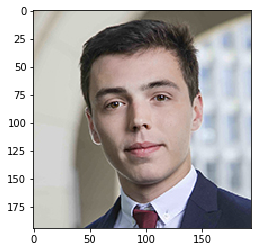

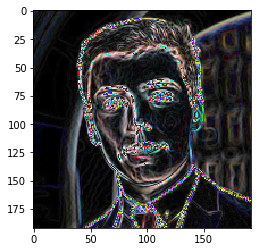

In [5]:
img = Image.open('18_pierre_monroy.jpg')
plt.imshow(img)
plt.show()
arr = np.array(img)
sobol_x = np.asmatrix([[-1, 0, 1],
           [-2, 0, 2], 
           [-1, 0, 1]])

sobol_y = np.asmatrix([[1, 2, 1], 
           [0, 0, 0], 
           [-1,-2,-1]])

def sobolop(px_nb):

    x_p=np.sum(np.diag(np.dot(px_nb, sobol_x.T)))
    y_p=np.sum(np.diag(np.dot(px_nb, sobol_y.T)))

    val = np.ceil(np.sqrt(x_p**2 + y_p**2))
    
    return val

def img_apply(imag):
    height = imag.shape[0]
    width = imag.shape[1]
    res = np.zeros((height - 2, width - 2, imag.shape[2]))

    for z in range(imag.shape[2]):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                res[i - 1, j - 1, z] = sobolop(np.asmatrix(imag[i - 1:i + 2, j - 1:j + 2, z]))

    return res

test = img_apply(arr)
img = Image.fromarray(test.astype('uint8'), 'RGB')

plt.imshow(img)
plt.show()